<font size="3"><center><b>SINTA BELLA</b> 09011181722072</font></center></br>
<center>Kecerdasan Buatan (AI)</i></font></center>
<center>Sistem Komputer, SK 5B </center>
<center>Universitas Sriwijaya </center>

<center><h1>DESCRIPTIONS SPECIES MUSHROOM </h1></center>

# PENDAHULUAN
kumpulan data ini mencakup deskripsi sample hipotesis yang sesuai dengan 23 species jamur yang dipanggang di agaricus dan keluarga lepiota,setiap spesies dapat diidentifikasi sebagai dapat dimakan,pasti beracun,atau tidak dapat dimakan dan tidak direkomendasikan

In [40]:
import numpy as np                                   ## Modul numpy
from sklearn.preprocessing import MinMaxScaler       ## Modul Sklearn (untuk mengetahui nilai tengah)
import matplotlib.pyplot as plt                      ## modul matplotlib untuk memplot gambar
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd                                  ## modul numpy

In [41]:
data = pd.read_csv('mushroom_dataset.csv') ##Import data set menggunakan pandas

In [42]:
data.head() ## Mengambil 5 baris pertama

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
0,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,0
1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,0
2,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,0
3,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,0
4,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,0


In [43]:
enc = LabelEncoder()
dataset = data.apply(enc.fit_transform)
dataset.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
0,2,3,8,0,0,1,1,1,10,1,...,7,7,0,2,1,4,6,4,6,0
1,2,3,8,0,0,1,1,1,10,1,...,7,7,0,2,1,4,1,4,6,0
2,2,3,8,0,0,1,1,1,7,1,...,7,7,0,2,1,4,6,4,6,0
3,2,3,8,0,0,1,1,1,7,1,...,7,7,0,2,1,4,1,4,6,0
4,2,3,8,0,0,1,1,1,1,1,...,7,7,0,2,1,4,6,4,6,0


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
cap-shape                   8416 non-null int32
cap-surface                 8416 non-null int32
cap-color                   8416 non-null int32
bruises                     8416 non-null int32
odor                        8416 non-null int32
gill-attachment             8416 non-null int32
gill-spacing                8416 non-null int32
gill-size                   8416 non-null int32
gill-color                  8416 non-null int32
stalk-shape                 8416 non-null int32
stalk-root                  8416 non-null int32
stalk-surface-above-ring    8416 non-null int32
stalk-surface-below-ring    8416 non-null int32
stalk-color-above-ring      8416 non-null int32
stalk-color-below-ring      8416 non-null int32
veil-type                   8416 non-null int32
veil-color                  8416 non-null int32
ring-number                 8416 non-null int32
ring-type                   8

In [45]:
dataset.shape #Tampilkan jumlah baris dan kolom

(8416, 23)

# Persebaran data

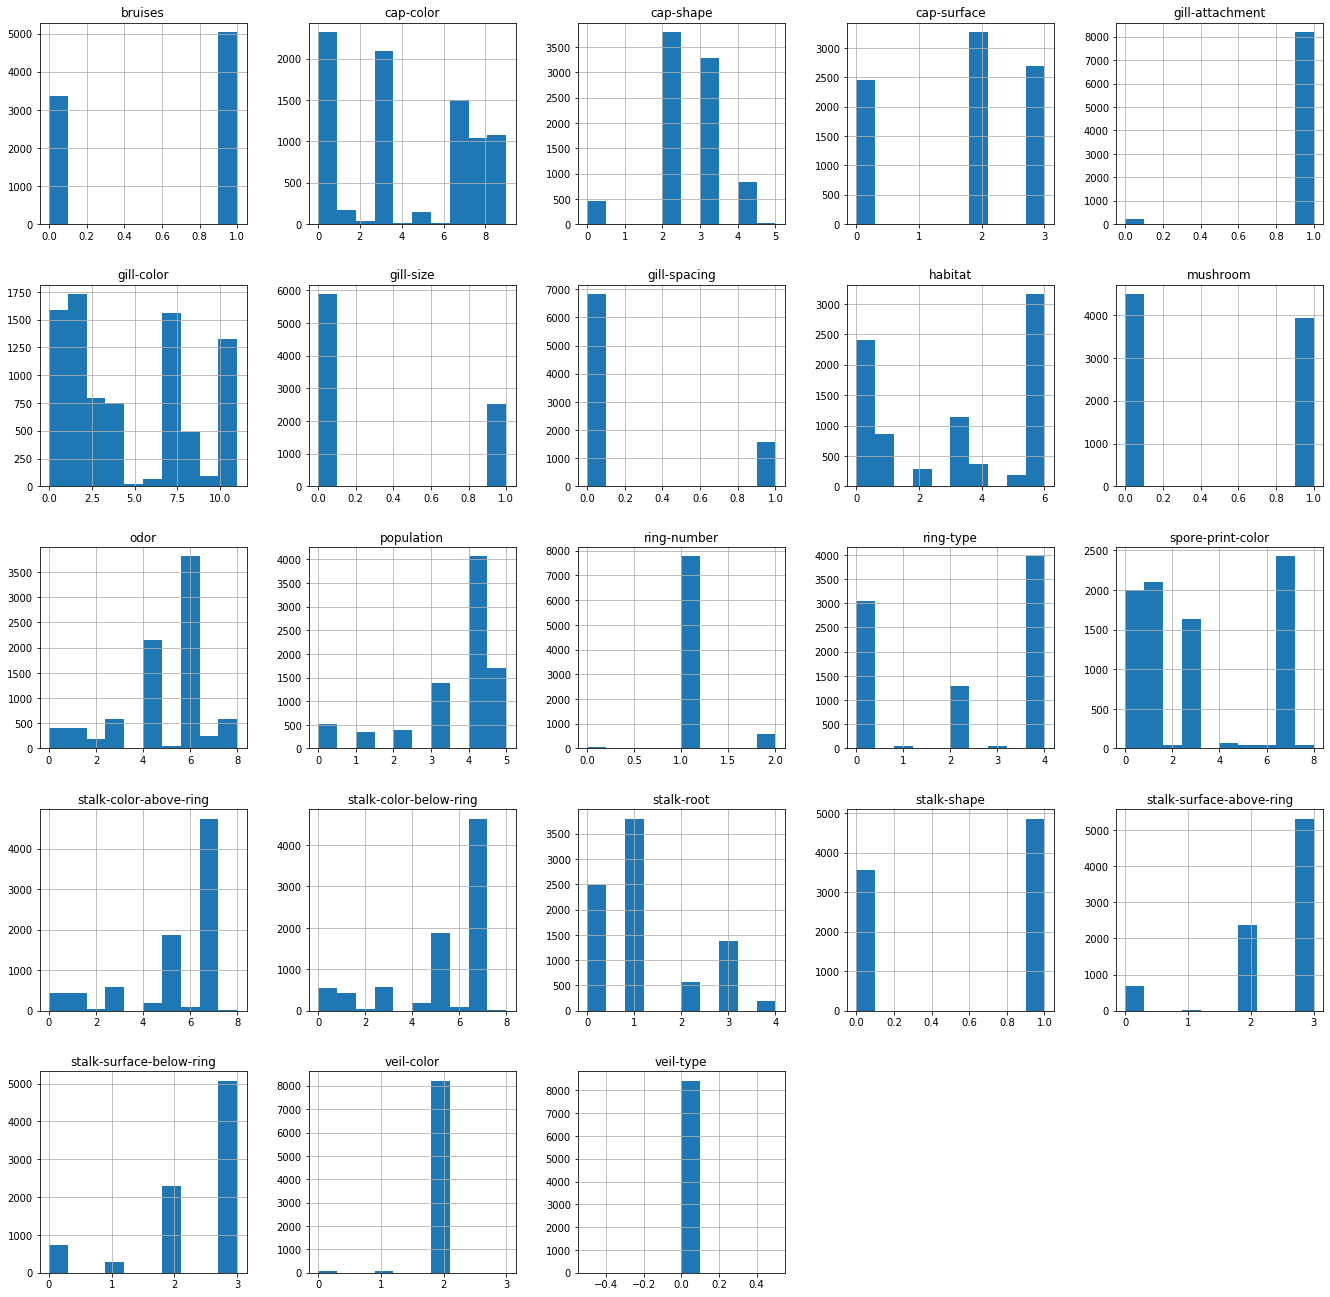

In [46]:
dataset.hist(figsize=(23,23)) 
plt.show() 

# Set data dan Target
Set data untuk feature yaitu kolom 1-22 dan kolo 23 sebagai target

In [47]:
features = dataset.iloc[:,0:22].values
labels = dataset.iloc [:, 22].values

In [48]:
dataa=pd.DataFrame(features)
dataa

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2,3,8,0,0,1,1,1,10,1,...,3,7,7,0,2,1,4,6,4,6
1,2,3,8,0,0,1,1,1,10,1,...,3,7,7,0,2,1,4,1,4,6
2,2,3,8,0,0,1,1,1,7,1,...,3,7,7,0,2,1,4,6,4,6
3,2,3,8,0,0,1,1,1,7,1,...,3,7,7,0,2,1,4,1,4,6
4,2,3,8,0,0,1,1,1,1,1,...,3,7,7,0,2,1,4,6,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,4,3,0,1,6,0,0,0,1,0,...,3,4,4,0,0,1,4,1,1,1
8412,4,3,0,1,6,0,0,0,1,0,...,3,4,4,0,0,1,4,5,4,1
8413,4,3,0,1,6,0,0,0,1,0,...,3,4,4,0,0,1,4,5,1,1
8414,4,3,0,1,6,0,0,0,1,0,...,3,4,4,0,0,1,4,2,4,1


# Scaling

Karena Dilihat pada persebaran data,agar tidak memiliki standar deviasi yang tinggi,maka selanjutnya akan di scaling,dimana nilai max adalah1 dan minimal adalah 0

In [49]:
scaler = MinMaxScaler()
data = scaler.fit_transform(features)

#Buat variabel data_dataframe hanya untuk menampilkan,selanjutnya variabel data akan tetap dalam bentuk numpy array
data_dataframe = pd.DataFrame(data)
data_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.4,1.0,0.888889,0.0,0.0,1.0,1.0,1.0,0.909091,1.0,...,1.0,0.875,0.875,0.0,0.666667,0.5,1.0,0.750,0.8,1.0
1,0.4,1.0,0.888889,0.0,0.0,1.0,1.0,1.0,0.909091,1.0,...,1.0,0.875,0.875,0.0,0.666667,0.5,1.0,0.125,0.8,1.0
2,0.4,1.0,0.888889,0.0,0.0,1.0,1.0,1.0,0.636364,1.0,...,1.0,0.875,0.875,0.0,0.666667,0.5,1.0,0.750,0.8,1.0
3,0.4,1.0,0.888889,0.0,0.0,1.0,1.0,1.0,0.636364,1.0,...,1.0,0.875,0.875,0.0,0.666667,0.5,1.0,0.125,0.8,1.0
4,0.4,1.0,0.888889,0.0,0.0,1.0,1.0,1.0,0.090909,1.0,...,1.0,0.875,0.875,0.0,0.666667,0.5,1.0,0.750,0.8,1.0


In [50]:
Clasifications = 2

# Spliting
Membagi data secara acak,dengan presentase 80% untuk data latih,20% untuk data testing. Random atate digunakan agar data yang sudah baik,tidak diacak lagi saat spliting,agar persebran data tidak berubah,yang bisa mempengaruhi learning dari model. 

In [51]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.2, shuffle=True, stratify=labels)

In [52]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model
Menggunakan 1 input layer dengan 22 neuron,2 hidden layer dengan 100 & 50 neuron (fungsi aktivasi relu) dan 1 output layer dengan 1 neuron (fungsi aktivasi sigmoid).

# Compile Data
Menggunakan categorical_crossentropy dan metric akurasi sebagai parameternya

In [53]:
model = Sequential()
model.add(Dense(units= 100, input_dim = 22, activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

# FIT
Proses training model. Disini dilakukan training model,dimana jaringan saraf tiruan akan melakukan learning berdasarkan data latih yaitu data training (feature) dan target training (target). Disini juga dilakukan validasi dengan di uji,ditampung pada variabel data testing (feature) dan target testing (target). Guna dilakukan proses training model adalah agar setiap epochnya dapat ditampung dalam variabel history validasi,sehingga bisa di plot perubahannya.

In [54]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=32, epochs=100)
acc_testing  = model.evaluate(testing_data, testing_label) 

Train on 6732 samples, validate on 1684 samples
Epoch 1/100
6732/6732 [==============================] - 6s 882us/step - loss: 0.3512 - accuracy: 0.8494 - val_loss: 0.1641 - val_accuracy: 0.9400
Epoch 2/100
6732/6732 [==============================] - 2s 308us/step - loss: 0.1280 - accuracy: 0.9569 - val_loss: 0.0642 - val_accuracy: 0.9816
Epoch 3/100
6732/6732 [==============================] - 2s 287us/step - loss: 0.0703 - accuracy: 0.9773 - val_loss: 0.0332 - val_accuracy: 0.9917
Epoch 4/100
6732/6732 [==============================] - 2s 278us/step - loss: 0.0398 - accuracy: 0.9886 - val_loss: 0.0180 - val_accuracy: 0.9947
Epoch 5/100
6732/6732 [==============================] - 2s 287us/step - loss: 0.0209 - accuracy: 0.9955 - val_loss: 0.0089 - val_accuracy: 0.9982
Epoch 6/100
6732/6732 [==============================] - 2s 306us/step - loss: 0.0138 - accuracy: 0.9979 - val_loss: 0.0055 - val_accuracy: 0.9994
Epoch 7/100
6732/6732 [==============================] - 2s 278us/step

# Perhitungan Akurasi
Evaluasi dengan mencari skor data testing.Nilai evaluasi disimpan pada variabel scores


In [55]:
scores = model.evaluate(testing_data, testing_label)
print('akurasinya adalah {}'.format(acc_testing[1]))

1684/1684 [==============================] - 0s 77us/step
akurasinya adalah 1.0


In [56]:
acc_training.history

{'val_loss': [0.16411285679300722,
  0.06417110215456638,
  0.03316384648590077,
  0.018047942193733825,
  0.008943691626279626,
  0.005497921414168955,
  0.003266998117893598,
  0.002824414988499657,
  0.0011519184139045066,
  0.0011703508685264436,
  0.0008023816278793864,
  0.0003016285052563942,
  0.0002936203302046137,
  0.0003049099958068171,
  0.0008079699687586463,
  0.00011177384201675735,
  0.0001069019061736605,
  0.00011789344701262837,
  0.018125343432228554,
  9.570915667252917e-05,
  0.00020655426634261977,
  4.278148586825133e-05,
  0.00010658650210853379,
  9.06814725205675e-05,
  0.00012363027456984067,
  6.913666063983091e-05,
  3.6825525714800435e-05,
  5.5192454605945156e-05,
  3.131553247816708e-05,
  2.4261673639336665e-05,
  7.365161277415946e-05,
  5.0169989853901286e-05,
  2.2837890067463667e-05,
  3.155488948797102e-05,
  3.074024212876182e-05,
  1.829467798414242e-05,
  1.3830806023971349e-05,
  2.1322963612845283e-05,
  7.213933486144521e-06,
  8.7345051508

# Plot Akurasi Model
Evaluasi akurasi model,dibuat plot yang menunjukkan perbandingan dari hasil learning pada data uji dan data latih

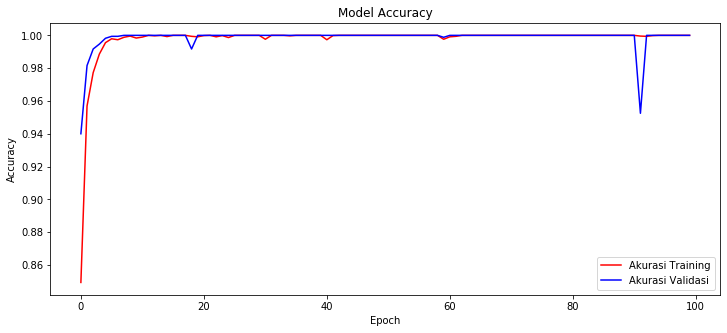

In [57]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

# Plot Loss
Evaluasi loss/error model,dibuat plt yang menunjukkan perbandingan dari hasil learning pada data uji dan data latih

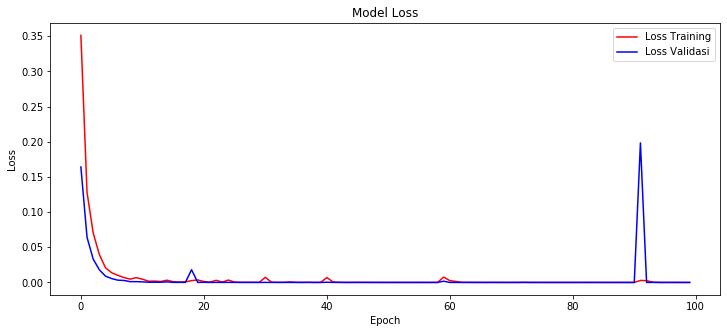

In [58]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

In [59]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [60]:
training_predicted

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

# Confussion matrix
selanjutnya untuk mengevaluasi hasil prediksi,akan dibuat confussion matrix. Fungsinya untuk melihat hasil prediksi,yang akan digolongkan menjadi beberapa kategori. karena klasifikasinya adalah binary (1 dan 0) maka ada 4 kemungkinan prediksi yaitu true positive,false positive,false negative,true negative. Berikut ditampilkan hasil dari setiap klasifikasinya,pertama adalah menampung isi dari prediksi pada variabel prediction.

In [61]:
from sklearn.metrics import confusion_matrix
prediction = model.predict_classes(testing_data)+1
for i in range (len(prediction)):
    if(prediction[i]==2):
        prediction[i]=0
cm = confusion_matrix(testing_label, prediction)
cm


array([[  0, 898],
       [786,   0]], dtype=int64)

In [62]:
print(testing_label)
print(prediction)

[1 0 0 ... 0 1 0]
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


In [63]:
#training
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

NameError: name 'training_cm' is not defined

In [ ]:
print(testing_cm)

In [ ]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(testing_label,prediction))